# Linear Algebra for Quantum Computing

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import math
from qiskit import *
from qiskit.visualization import plot_bloch_vector, plot_bloch_multivector, plot_histogram

In [2]:
def plot2DVector(vector):
    plt.figure()
    ax = plt.gca()
    ax.quiver(vector[0], vector[1], angles='xy', scale_units='xy', scale=1)
    ax.set_xlim([-1, 10])
    ax.set_ylim([-1, 10])
    plt.draw()
    plt.show()
    
def plot3DVector(vector):
    plt.figure()
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    from mpl_toolkits.mplot3d import Axes3D
    #Axes3D.plot3D(ax, xs=[0,0,0], ys=[vector[0],vector[1], vector[2]])
    
    values = np.array([[0, 0, 0]])
    values=[np.append(values,vector)]
    #print(values)
    X, Y, Z, U, V, W = zip(*values)
    ax.quiver(X, Y, Z, U, V, W)
    ax.set_xlim([0, 10])
    ax.set_ylim([0, 10])
    ax.set_zlim([0, 10])
    plt.draw()
    plt.show()

def bra(vector):
    vector = np.conj(vector)
    vector = np.transpose(vector)
    return(vector)

## Vectors and Vector Spaces
We represent a vector $|v⟩$ with x and y components of the form $\begin{pmatrix} 7\\4 \end{pmatrix}$ in 2D and <br>
with x, y and z components of the form $\begin{pmatrix} 7\\4\\4 \end{pmatrix}$ in 3D and visualize as below.<br>

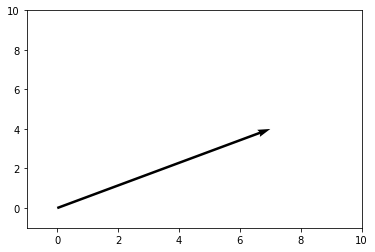

In [3]:
vector=[7,4]
plot2DVector(vector)

<Figure size 432x288 with 0 Axes>

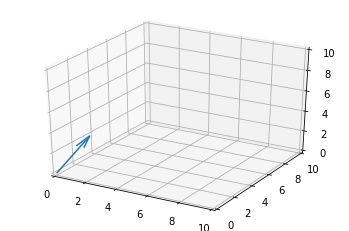

In [4]:
vector=[1,2,3]
plot3DVector(vector)

In QC, the state vectors point to a specific point in space - corresponds to a particular quantum state. We visualize this using a Bloch sphere. 

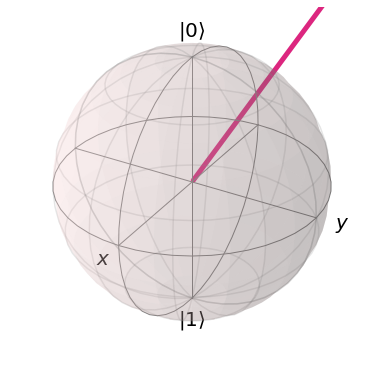

In [5]:
#Following plot is not too great!
plot_bloch_vector(vector)

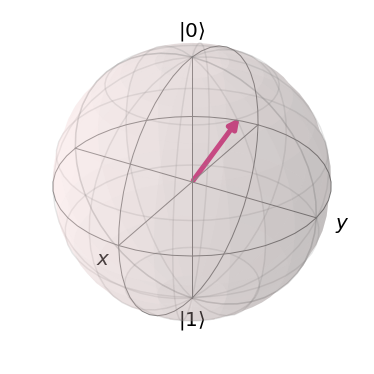

In [6]:
#So we normalise the vector with its length
length=math.sqrt(vector[0]**2+vector[1]**2+vector[2]**2)
bloch_vector=[x / length for x in vector]
plot_bloch_vector(bloch_vector)

The above state corresponds to a superposition between $|0⟩$ and $|1⟩$. Vectors can rotate anywhere on the surface of the sphere. Each of the points on the surface of the sphere represents a particular quantum state.

a vector = [1,0,0] corresponds to an even superposition state between $|0⟩$ and $|1⟩$ - the arrow will be halfway between $|0⟩$ at the top and $|1⟩$ at the bottom of the sphere.

To perform a quantum computation, we manipulate quantum states of a state vector by applying a matrix operator to that vector. A vector is simply a matrix with one column.

$|0> = \begin{pmatrix} 1\\0 \end{pmatrix}$ and
$|1> = \begin{pmatrix} 0\\1 \end{pmatrix}$


To apply a matrix to a vector, therefore, we follow the same matrix multiplication procedure described above. We manipulate qubits in our quantum computer by applying sequences of quantum gates. Each quantum gate can be expressed as a matrix that can be applied to state vectors, thus changing the state. 

A Pauli-X gate, $σ_x = \begin{pmatrix} 0 & 1\\1 & 0 \end{pmatrix}$

This gate acts similarly to the classical NOT logic gate. It maps the computational basis state 
$|0⟩$ to $|1⟩$ and $|1⟩$ to $|0⟩$ - "flips" the state.

$σ_x|0⟩ = \begin{pmatrix} 0 & 1\\1 & 0 \end{pmatrix}\begin{pmatrix} 1\\0 \end{pmatrix} = \begin{pmatrix} 0\\1 \end{pmatrix} = |1⟩$ and <br> 
$σ_x|1⟩ = \begin{pmatrix} 0 & 1\\1 & 0 \end{pmatrix}\begin{pmatrix} 0\\1 \end{pmatrix} = \begin{pmatrix} 1\\0 \end{pmatrix} = |0⟩$

In [7]:
#We define (without complex numbers)
pauliX = np.array([[0,1],[1,0]])
ket_0 = np.array([1, 0])
ket_1 = np.array([0, 1])

print (pauliX.dot(ket_0),' = |1>')
print (pauliX.dot(ket_1),' = |0>')

[0 1]  = |1>
[1 0]  = |0>


In [8]:
#But Actually a 1 in a Hilbert Space means
x_1 = 1+0j
#And a 0 means
x_0 = 0+0j
#Hence a |0> and |1> means
ket_0 = np.array([x_1, x_0])
ket_1 = np.array([x_0, x_1])

#And pauli X operator will look like
pauliX = np.array([[x_0,x_1],[x_1,x_0]])

print('1 : ',x_1, '0 : ',x_0, '\n|0> : ',ket_0, '|1> : ',ket_1, '\nPauli X : ',pauliX)
#So
print ('\nX|0> : ',pauliX.dot(ket_0),' = |1>')
print ('X|1> : ',pauliX.dot(ket_1),' = |0>')

1 :  (1+0j) 0 :  0j 
|0> :  [1.+0.j 0.+0.j] |1> :  [0.+0.j 1.+0.j] 
Pauli X :  [[0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j]]

X|0> :  [0.+0.j 1.+0.j]  = |1>
X|1> :  [1.+0.j 0.+0.j]  = |0>


In [9]:
#Now we do a complex conjugate of pauliX and will see how it looks like
pauliX_conj=np.conjugate(pauliX)
print('X_conj : ',pauliX_conj)
pauliX_adj=np.transpose(pauliX_conj)
print('X_adj : ',pauliX_adj)
#And it is the same as pauliX
#So an inner product of the two would be an identity matrix
print('<X|X> : ',pauliX.dot(pauliX_adj))

X_conj :  [[0.-0.j 1.-0.j]
 [1.-0.j 0.-0.j]]
X_adj :  [[0.-0.j 1.-0.j]
 [1.-0.j 0.-0.j]]
<X|X> :  [[1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j]]


In [10]:
#Now we define imaginary i as i1 and -i as i_1 as
i1=0+1j
i_1=0-1j
#So pauliY and pauliZ can be written as
pauliY = np.array([[x_0,-i1],[i1,x_0]])
pauliZ = np.array([[x_1,x_0],[x_0,-x_1]])
print (pauliY)
print (pauliZ)
#If we do an adjoint of pauliY, we get
pauliY_adj = np.transpose(np.conjugate(pauliY))
print(pauliY_adj)
#Which is identical to pauliY
#And the inner product of the two will yield an Identity vector
pauliY.dot(pauliY_adj)

[[ 0.+0.j -0.-1.j]
 [ 0.+1.j  0.+0.j]]
[[ 1.+0.j  0.+0.j]
 [ 0.+0.j -1.-0.j]]
[[ 0.-0.j  0.-1.j]
 [-0.+1.j  0.-0.j]]


array([[1.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j]])

In [11]:
#In a single qubit H-Space, in our QC, ket_0 (|0>) and ket_1 (|1>) are one of the basis set.
#Any other qubit state can be expressed as a linear combination of these basis vectors. 
#For instance, the linear combination (|0⟩ + |1⟩)/√2
#It represents a superposition between the |0⟩ and |1⟩ basis state, with equal probability of 
#measuring the state to be in either one of the basis vector states 
#the "weight" or the "amount of each basis vector" in the linear combination is equal, both being scaled by 1/√2

#One of the most important conditions for a H-Space representing a quantum system is that 
#the inner product of a vector with itself is equal to one: ⟨ψ|ψ⟩ = 1
#This is normalization condition, which states that the length of the vector squared must be equal to one. 
#The physical significance - the length of a vector in a particular direction is representative of 
#the "probability amplitude" of the quantum system with regards to measurement in that particular state. 
#Obviously, the probability of the quantum system being measured in the state that it is in must be 1 
import math
amp_50 = 1/math.sqrt(2)
print (amp_50)
psi=superposition_01 = amp_50*ket_0 + amp_50*ket_1
print("Original Array:")
print(superposition_01)
print (psi.dot(psi), ' = <psi|psi> = 1')

#What happens when we use pauliY operator (a Unitary Operator) on psi
psi_D = pauliY.dot(psi)
print(psi_D)
print (psi_D.dot(psi_D), ' = <psi_D|psi_D> = 1')
#So even the evolved state psi_D will behave the required way

0.7071067811865475
Original Array:
[0.70710678+0.j 0.70710678+0.j]
(0.9999999999999998+0j)  = <psi|psi> = 1
[0.-0.70710678j 0.+0.70710678j]
(-0.9999999999999998+0j)  = <psi_D|psi_D> = 1


## How to create an observable (operator)

### Method 1 from another observable - usually a Hamiltonian
Any operator U created as
$U = e^{i\gamma{H}}$ is an Unitary Operator,
$\gamma$ being any real multiple of $\pi$

Now, pauliZ($\sigma{_z}$) is a Hermitian Matrix (H).
So we may create a Unitary operator U, where $\gamma = \pi/2$ and $H = \sigma{_z}$

In [12]:
igamma=np.pi*0.5j
H=igamma*pauliZ
print(H)
from scipy import linalg
from scipy.linalg import expm
U = expm(H)
print(U)
#So U is Unitary, is it ? It it is the U(U_inv)=I
U_inv=linalg.inv(U)
np.dot(U, U_inv)
#And yes, it results in an I, Identity Matrix

[[0.+1.57079633j 0.+0.j        ]
 [0.+0.j         0.-1.57079633j]]
[[0.+1.j 0.+0.j]
 [0.+0.j 0.-1.j]]


array([[1.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j]])

In [13]:
#Now we will use this Unitary Matrix U to evolve a state psi
psi_D = U.dot(psi)
print(psi)
print(psi_D)
psi_D.dot(psi_D)
#But the real part is not 1!

[0.70710678+0.j 0.70710678+0.j]
[0.+0.70710678j 0.-0.70710678j]


(-0.9999999999999998+0j)

In [14]:
def normalize (U):
    Umax, Umin = U.max(), U.min()
    U = (U - Umin)/(Umax - Umin)
    return (U)

#Normalize a complex vector
def normalizeVector(V):
    #Get real parts
    A=V[0].real
    B=V[1].real
    length=math.sqrt(A**2+B**2)
    V = V/length
    return(V)

In [15]:
#That was because we need to normalise U
U = normalize(U)
print("After normalization:")
print(U)
#After Normalisation, we perform the same evolution of psi
psi_D = U.dot(psi)
print(psi_D)
psi.dot(psi_D)
#Now the real part is 1

After normalization:
[[1. +0.j 0.5+0.j]
 [0.5+0.j 0. +0.j]]
[1.06066017+0.j 0.35355339+0.j]


(0.9999999999999998+0j)

So if $\gamma = \pi/2$, what is $e^{i\gamma}$ ?

In [16]:
#e^iG
exp_iG=np.exp(igamma)
#e^(-iG)
exp_MiG=np.exp(-igamma)
#Now let us see the eigenvectors of pauliZ
eig_values, eig_v = linalg.eig(pauliZ)
print('Eigen Values of Z: ',eig_values)
print('Eigen Vectors of Z: ',eig_v)
#So ket_0 (|0>) and ket_1 (|1>) are the egen vectors of pauliZ
#What are the eigen vectors of U?
eig_values, eig_v = linalg.eig(U)
print('Eigen Values of U: ',eig_values)
print('Eigen Vectors of U: ',eig_v)
#The vectors look the same, viz., |0> and |1>, because these are the basis vectors.
#but the eigen values are different
#As it has added phase exp_iG to |0> and exp_MiG to |1>
print(exp_iG)
print(exp_MiG)

Eigen Values of Z:  [ 1.+0.j -1.-0.j]
Eigen Vectors of Z:  [[1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j]]
Eigen Values of U:  [ 1.20710678+0.j -0.20710678+0.j]
Eigen Vectors of U:  [[ 0.92387953+0.j -0.38268343+0.j]
 [ 0.38268343-0.j  0.92387953+0.j]]
(6.123233995736766e-17+1j)
(6.123233995736766e-17-1j)


In [17]:
#Now let us make the Hamiltonian (H) as igamma * pauliX
H=igamma * pauliX
#Our new unitary operator is U_x
U_x = expm(H)
#We normalize this 
U_x = normalize(U_x)
print('U_x : ',U_x)
psi_D = U_x.dot(psi)
#We verify its unitariness
psi_D.dot(psi)
print ('psi : ',psi)
print('psi_D : ',psi_D)
#Now we calculate the eigenvectors
eig_values, eig_v = linalg.eig(U_x)
print('Eigen Values of U_x: ',eig_values)
print('Eigen Vectors of U_x: ',eig_v)
#Let us see what are (|0> + |1>)/^2 and (|0>-|1>)/^2 looks like
A= amp_50*ket_0 + amp_50*ket_1
B= amp_50*ket_0 - amp_50*ket_1
print ('A: ',A,'\nB: ',B)

U_x :  [[0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j]]
psi :  [0.70710678+0.j 0.70710678+0.j]
psi_D :  [0.70710678+0.j 0.70710678+0.j]
Eigen Values of U_x:  [ 1.+0.j -1.+0.j]
Eigen Vectors of U_x:  [[ 0.70710678-0.j  0.70710678+0.j]
 [ 0.70710678+0.j -0.70710678+0.j]]
A:  [0.70710678+0.j 0.70710678+0.j] 
B:  [ 0.70710678+0.j -0.70710678+0.j]


[  0. 180.]
[ 0.70710678+0.j -0.70710678+0.j]


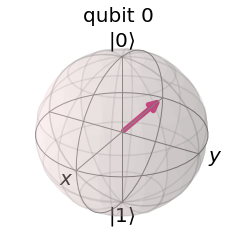

In [18]:
import cmath
A= amp_50*ket_0 - amp_50*ket_1
print(np.angle(A, deg=True))
print(A)
plot_bloch_multivector(A)

[ 0.70710678 -0.70710678]


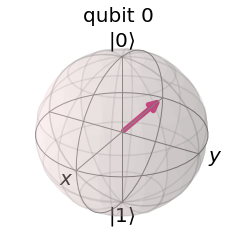

In [19]:
A=A.real
print(A)
plot_bloch_multivector(A)

Now we shall create arbitrary state vectors $|\psi1>$ and $|\psi2>$, and visualize them.

[0.9 +0.j 0.4 +0.j 0.3 +0.j 0.95+0.j]


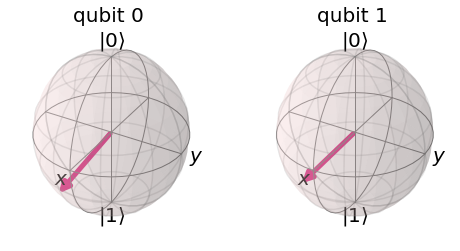

In [20]:
psi1=0.9*ket_0 + 0.4*ket_1
psi2=0.3*ket_0 + 0.95*ket_1
psi = np.concatenate((psi1, psi2), axis=None)
print (psi)
plot_bloch_multivector(psi)

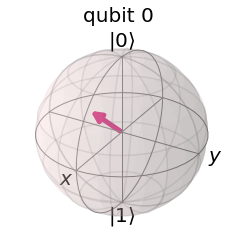

In [21]:
plot_bloch_multivector(psi1)

Let us apply a Unitary Operator on $|\psi1>$ and see how it changes the overall state vector.

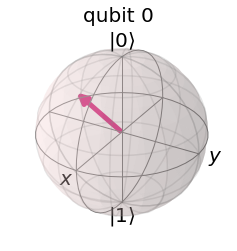

In [22]:
plot_bloch_multivector(U.dot(psi1))

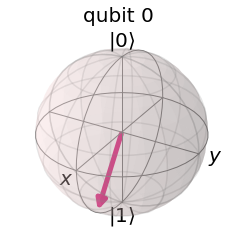

In [23]:
plot_bloch_multivector(psi2)

Let us apply a Unitary Operator on $|\psi2>$ and see how it changes the overall state vector.

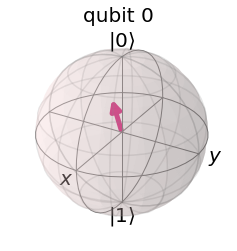

In [24]:
plot_bloch_multivector(U.dot(psi2))

In QC, for a quantum operator <b>Linearity</b> holds, i.e., operator/observable $U$ acting on a linear combination of two state vectors $\psi1>$ and $|\psi2$ results in,<br>
$U(\alpha|\psi1> + \beta|\psi2>) = \alpha(U|\psi1>) + \beta(U|\psi2>$)

In [25]:
alpha=2; beta=3
LHS = U.dot(alpha*psi1 + beta*psi2)
print('LHS : ', LHS)
print(alpha*(U.dot(psi1))+beta*(U.dot(psi2)))

LHS :  [4.525+0.j 1.35 +0.j]
[4.525+0.j 1.35 +0.j]


[0.95826232+0.j 0.28589042+0.j]


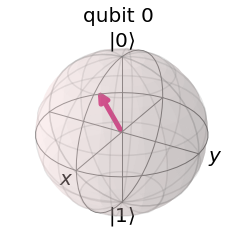

In [26]:
LHS1=normalizeVector(LHS)
print(LHS1)
plot_bloch_multivector(LHS1)

### Method 2 to create an observable from Arbitrary State Vectors
An outer product of a $|\psi1>$ and a $|\psi2>$ is an operator, i.e., <br>
$U1 = |\psi{1}><\psi{2}|$ will be an operator, so let us verify:

In [27]:
U1 = np.outer(psi1,psi2)
U1 = normalize(U1)
print(U1)
#Is U1 Unitary, i.e., is U1(U1_inv)=I?
U1_inv=linalg.inv(U1)
np.dot(U1, U1_inv)
#And yes, it results in an I, Identity Matrix

[[0.20408163+0.j 1.        +0.j]
 [0.        +0.j 0.3537415 +0.j]]


array([[ 1.0000000e+00+0.j, -4.4408921e-16+0.j],
       [ 0.0000000e+00+0.j,  1.0000000e+00+0.j]])

Identically if the operator uses only one state, then it is known as the <b>Projection Operator</b>, i.e., <br>
$P = |\psi1><\psi1|$ is a Projection Operator of $\psi1$.

In [28]:
P = np.outer(psi1,psi1)
P = normalize(P)
print(P)
#Is U1 Unitary, i.e., is U1(U1_inv)=I?
P_inv=linalg.inv(P)
np.dot(P, P_inv)
#And yes, it results in an I, Identity Matrix

[[1.        +0.j 0.30769231+0.j]
 [0.30769231+0.j 0.        +0.j]]


array([[1.00000000e+00+0.j, 0.00000000e+00+0.j],
       [3.41607085e-17+0.j, 1.00000000e+00+0.j]])

In this method as well, we can create arbitrarily complex operators, using the basis. For example, <br>
$U = 3i|0><0| + 2i|0><1|$ or <br>
$U = (4+i)|+><-| + (0.2+0.1i)|-><-|$ or etc.

Now what do we want our operator to do? To transform, usually. <br>
In the 2D H-Space, a typical operator/observable is <br>
$A = \begin{pmatrix} a & b\\c & d \end{pmatrix}$
And in terms of the basis vectors, say $|0>$ and $|1>$, it is written as, <br>
To write the matrix representation of an operator with respect to the computational
basis, we use the following convention to arrange the matrix elements:
$A = \begin{pmatrix} <0|A|0> & <0|A|1>\\<1|A|0> & <1|A|1> \end{pmatrix}$<br>
Now, if we want a transformation like <br>
$|0> |-> |+>$ and $|1> |-> |0>$, i.e., $A|0> = |+>$ and $A|1> = |0>$, i.e., 
then A will look like, <br>
$A = \begin{pmatrix} <0|+> & <0|0>\\<1|+> & <1|0> \end{pmatrix}$<br>
or, $A = \begin{pmatrix} 1/\sqrt{2}<0|(|0>+|1>)> & <0|0>\\1/\sqrt{2}<1|(|0>+|1>)> & <1|0> \end{pmatrix}$<br>
or, $A = \begin{pmatrix} 1/\sqrt{2} & 1\\1/\sqrt{2} & 0 \end{pmatrix}$


In [29]:
A = np.array([[0.707+0.j, 1+0.j],[0.707+0.j,0+0.j]])
#Now we calculate the eigenvectors of this arbitrary operator
A = normalize(A)
eig_values, eig_v = linalg.eig(A)
print('Eigen Values of U_x: ',eig_values)
print('Eigen Vectors of U_x: ',eig_v)
print(A.dot(ket_0))
print(A.dot(ket_1))

Eigen Values of U_x:  [ 1.26561965+0.j -0.55861965+0.j]
Eigen Vectors of U_x:  [[ 0.87301927+0.j -0.61995993+0.j]
 [ 0.48768572-0.j  0.78463347+0.j]]
[0.707+0.j 0.707+0.j]
[1.+0.j 0.+0.j]


Acc. to spectral decomposition, if we get $\lambda_1, \lambda_2$ as eigen values and $|u_1>, |u_2>$ as the eigen vectors 
of an operator A then, one can verify, <br>
$A = \lambda_1(|u_1><u_1|) + \lambda_2(|u_2><u_2|$

## Expectation Value of an Operator
It is $<\psi|A|\psi>$ wth respect to a state $\psi$ <br>
It is the average measurement result. But usually it is never found. When we will measure we will get either the $\lambda_1$ or $\lambda_2$

In [32]:
psi = (1.0+0.2j)*ket_0 + (0.2+0.9j)*ket_1
expectation_value=psi.dot(A.dot(psi))
print (expectation_value)

(0.7128599999999999+1.8873800000000003j)


## Probability of a measurement using Projection Operator

A generic state is 
$$|\psi> = \sum_{i=1}^n(\alpha_i|u_i>)$$

The projection operator corresponding to this state is simply,
$$P =|\psi><\psi|$$

In $C^2$ with basis vectors $\{|0>, |1>\}$, the state becomes,
$$|\psi> = \alpha_1|0>+\alpha_2|1>)$$ 

The projection operators corresponding to the basis vectors are <br>
$P_0=|0><0|$ , $P_1=|1><1|$

The probability of finding the ith outcome when a measurement is made on a system prepared in the state $|\psi>$ is
$$|P_i|\psi>|^2 = <\psi|P_i^\dagger P_i|\psi> = <\psi|P_i^2|\psi> = <\psi|P_i|\psi>^* = |\alpha_i|^2$$

\* If the state $|\psi>$ is normalized, then a projection operator is equal to its own square.

In $C^2$ with basis vectors $\{|0>, |1>\}$, the probability of finding the |1> when a measurement is made on such a system is
$$|P_1|1>|^2 = <1|P_i|1> = |\alpha_2|^2$$


[0.57735027+0.j 0.81649658+0.j] [0.57735027-0.j 0.81649658-0.j]
0.6666666666666666 (0.6666666666666666+0j)


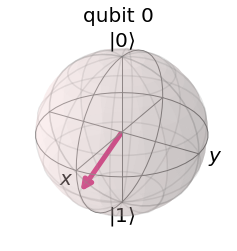

In [33]:
psi = (1/math.sqrt(3))*ket_0 + (math.sqrt(2/3))*ket_1
psi_bra=bra(psi)
print(psi, psi_bra)
P_1 = np.outer(ket_1,bra(ket_1))
prob_1 = psi_bra.dot(P_1.dot(psi))
print(2/3, prob_1)
plot_bloch_multivector(psi)

## Phase Shift Operators
R, a phase shift operator maps<br>
$|0> \mapsto |0>$,<br>
$|1> \mapsto e^{i\phi}|1>$. 

$\phi$ is $\pi$ for Pauli-Z gate, 
$\pi/2$ for S-gate and $\pi/4$ for T-gate. 

Generic representation of R is <br>
$R = \begin{pmatrix} 1 & 0\\0 & e^{i\phi} \end{pmatrix}$<br>
Let us see how such an operator with $\phi = \pi/6$ modifies the state vector $|\psi>$

[[1.       +0.j  0.       +0.j ]
 [0.       +0.j  0.8660254+0.5j]]
[0.57735027+0.j 0.81649658+0.j] [0.57735027+0.j         0.70710678+0.40824829j]
Expectation Value :  (0.9106836025229592+0.3333333333333333j) (0.9106836025229592+0.33333333333333326j)


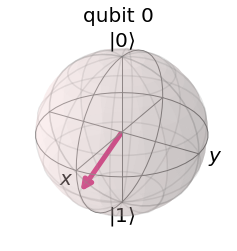

In [34]:
exp_phi = np.exp((np.pi/6)*1j)
R = np.array([[1.+0.j, 0.+0.j],[0.+0.j, exp_phi]])
print(R)
psi1 = R.dot(psi)
print(psi, psi1)
prob_1 = bra(psi).dot(R.dot(psi))
prob_2 = bra(psi1).dot(R.dot(psi1))
print('Expectation Value : ',prob_1, prob_2)
plot_bloch_multivector(psi)

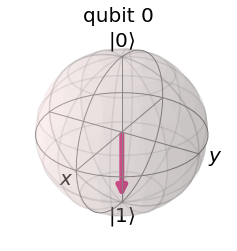

In [65]:
plot_bloch_multivector(psi1)

### Positive Semi-definite Operator

Expectation Value is +ve

[[ 1. +0.j         0. +0.j       ]
 [ 0. +0.j        -0.5+0.8660254j]]
Orginal :  [0.+0.j 1.+0.j]
Final :  [ 0. +0.j        -0.5+0.8660254j]
Expectation Value :  (-0.4999999999999998+0.8660254037844387j)
Not A Positive Semi-definite Operator


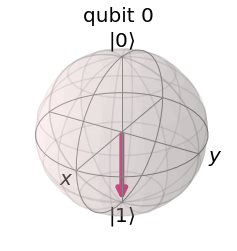

In [35]:
exp_phi = np.exp((np.pi/1.5)*1j)
R = np.array([[1.+0.j, 0.+0.j],[0.+0.j, exp_phi]])
print(R)
original_psi=ket_1
psi1 = R.dot(original_psi)
print('Orginal : ',original_psi)
print('Final : ',psi1)
prob_1 = bra(original_psi).dot(R.dot(original_psi))
print('Expectation Value : ',prob_1)
desc='Positive Semi-definite Operator'
if prob_1<0:
    print('Not A '+desc)
else:
    print(desc)
plot_bloch_multivector(psi1)

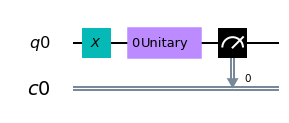

In [36]:
#How to implement this operator R in Qiskit?

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute
from qiskit.quantum_info.operators import Operator

qr = QuantumRegister(1)
cr = ClassicalRegister(1)
circuit = QuantumCircuit(qr,cr)
'''
cx = Operator([
    [1, 0, 0, 0],
    [0, 0, 0, 1],
    [0, 0, 1, 0],
    [0, 1, 0, 0]
])
'''
r = Operator(R)
#circuit.unitary(cx, [0, 1], label='cx')
circuit.x([0])
circuit.unitary(r, [0], label='R')
circuit.measure(qr,cr)
circuit.draw('mpl')

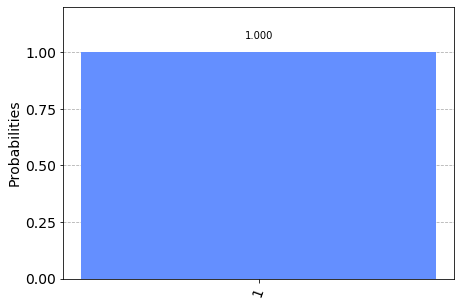

In [70]:
results = execute(circuit, backend=BasicAer.get_backend('qasm_simulator'), shots=100).result()
plot_histogram(results.get_counts())

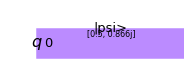

In [40]:
#How to prepare an arbitrary intialization state?

qc = QuantumCircuit(1)
#initial_state = [0,1]   # Define initial_state as |1>
#initial_state = [1/math.sqrt(2), complex(0,1/math.sqrt(2))] # Define state |psi> , 50%
initial_state = [math.sin(math.pi/6), complex(0,math.cos(math.pi/6))] # Define state |psi>
qc.initialize(initial_state, 0) # Apply initialisation operation to the 0th qubit
qc.draw('mpl') 

In [41]:
backend = Aer.get_backend('statevector_simulator')
result = execute(qc,backend).result()
out_state = result.get_statevector()
print(out_state) # Display the output state vector

[0.5+0.j        0. +0.8660254j]


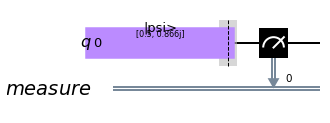

In [42]:
qc.measure_all()
qc.draw('mpl')

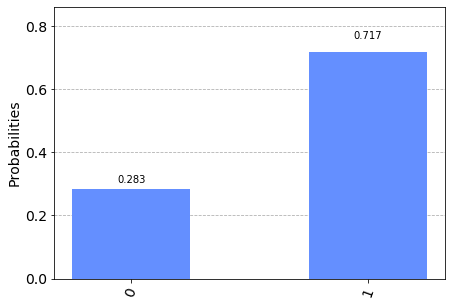

In [43]:
q_backend = Aer.get_backend('qasm_simulator')
result = execute(qc,q_backend, shots=1024).result()
counts = result.get_counts()
plot_histogram(counts)